# SVM with original wide data

In [1]:
import pandas as pd
wide_data = pd.read_csv('wide1.csv')

Kernel=linear, ROC AUC Score: 0.7473470309324903
Kernel=rbf, ROC AUC Score: 0.7643937683449988
Kernel=poly, ROC AUC Score: 0.7751185369157823


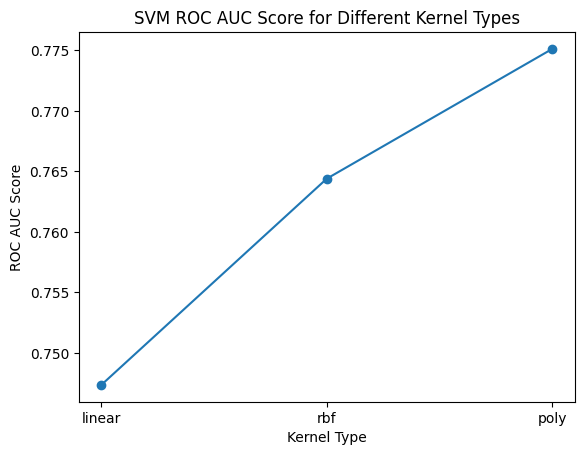

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

features = wide_data.drop(columns=['death', 'SUBJECT_ID'], axis=1)
labels = wide_data['death']
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Looping through different kernel types
kernel_values = ['linear', 'rbf', 'poly']
roc_auc_scores = []

for kernel in kernel_values:
    clf = svm.SVC(kernel=kernel, probability=True)  # Enabled probability
    clf.fit(X_train_smote, y_train_smote)
    y_probs = clf.predict_proba(X_test)[:, 1]  # Using predict_proba
    roc_auc = roc_auc_score(y_test, y_probs)
    roc_auc_scores.append(roc_auc)
    print(f"Kernel={kernel}, ROC AUC Score: {roc_auc}")

# Plotting the ROC AUC scores
plt.plot(kernel_values, roc_auc_scores, marker='o')
plt.xlabel('Kernel Type')
plt.ylabel('ROC AUC Score')
plt.title('SVM ROC AUC Score for Different Kernel Types')
plt.show()

ROC AUC Score: 0.7751185369157823


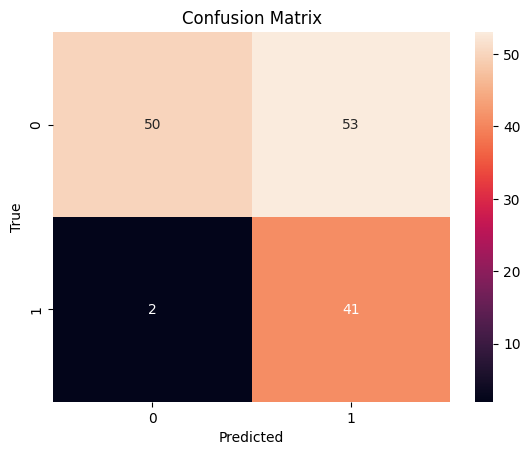

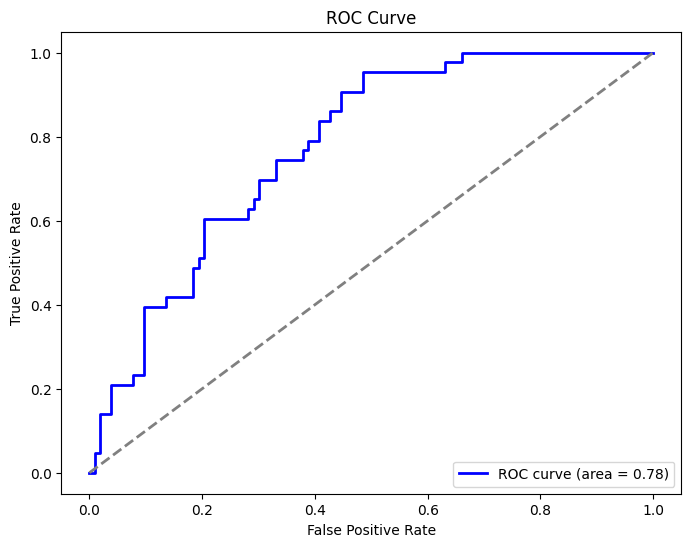

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
import seaborn as sns
from imblearn.over_sampling import SMOTE

features = wide_data.drop(columns=['death', 'SUBJECT_ID'], axis=1)
labels = wide_data['death']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

clf = svm.SVC(kernel='poly', probability=True)
clf.fit(X_train_smote, y_train_smote)

y_pred = clf.predict(X_test)

y_probs = clf.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_probs)
print(f"ROC AUC Score: {roc_auc}")

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# SVM with correlated binary column drop

In [4]:
wide_data_dropped_bin = pd.read_csv('wide_data_dropped_bin.csv')

Kernel=linear, ROC AUC Score: 0.7477986001354707
Kernel=rbf, ROC AUC Score: 0.7642808760442538
Kernel=poly, ROC AUC Score: 0.7755701061187628


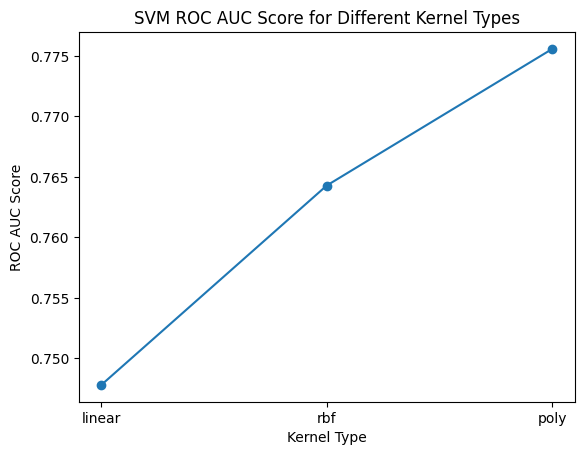

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

features = wide_data_dropped_bin.drop(columns=['death', 'SUBJECT_ID'], axis=1)
labels = wide_data_dropped_bin['death']
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Looping through different kernel types
kernel_values = ['linear', 'rbf', 'poly']
roc_auc_scores = []

for kernel in kernel_values:
    clf = svm.SVC(kernel=kernel, probability=True)  # Enabled probability
    clf.fit(X_train_smote, y_train_smote)
    y_probs = clf.predict_proba(X_test)[:, 1]  # Using predict_proba
    roc_auc = roc_auc_score(y_test, y_probs)
    roc_auc_scores.append(roc_auc)
    print(f"Kernel={kernel}, ROC AUC Score: {roc_auc}")

# Plotting the ROC AUC scores
plt.plot(kernel_values, roc_auc_scores, marker='o')
plt.xlabel('Kernel Type')
plt.ylabel('ROC AUC Score')
plt.title('SVM ROC AUC Score for Different Kernel Types')
plt.show()

ROC AUC Score: 0.7755701061187628


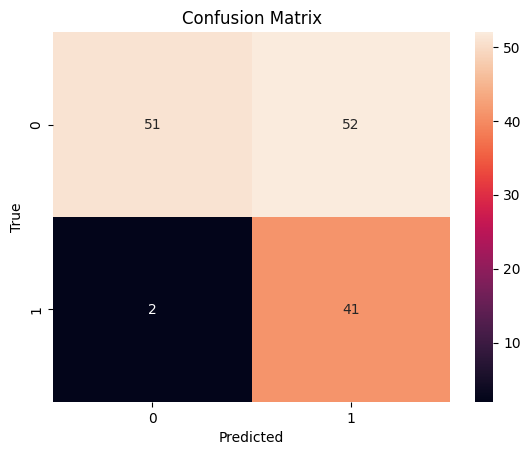

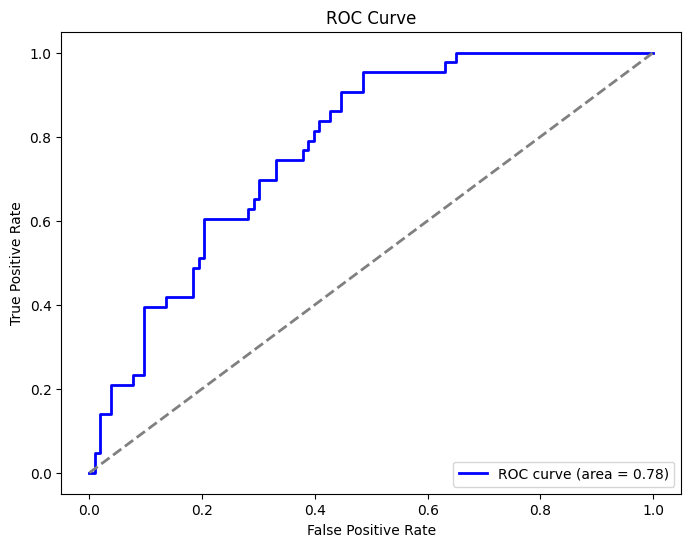

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
import seaborn as sns
from imblearn.over_sampling import SMOTE

features = wide_data_dropped_bin.drop(columns=['death', 'SUBJECT_ID'], axis=1)
labels = wide_data_dropped_bin['death']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

clf = svm.SVC(kernel='poly', probability=True)
clf.fit(X_train_smote, y_train_smote)

y_pred = clf.predict(X_test)

y_probs = clf.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_probs)
print(f"ROC AUC Score: {roc_auc}")

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# SVM with scaled correlated column drop

In [7]:
wide_data_dropped_time = pd.read_csv('wide_data_dropped_time.csv')

Kernel=linear, ROC AUC Score: 0.7473470309324904
Kernel=rbf, ROC AUC Score: 0.7639421991420186
Kernel=poly, ROC AUC Score: 0.7755701061187628


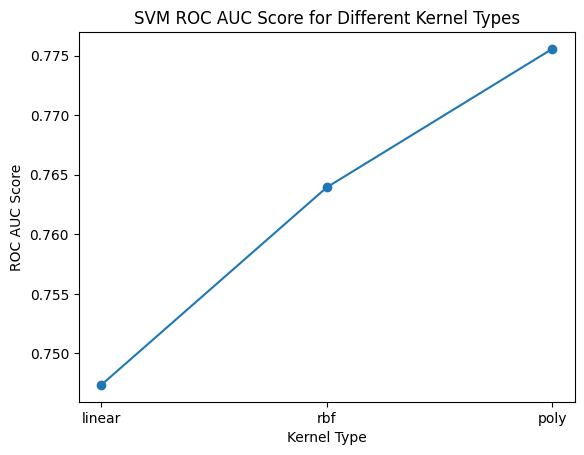

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

features = wide_data_dropped_time.drop(columns=['death', 'SUBJECT_ID'], axis=1)
labels = wide_data_dropped_time['death']
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Looping through different kernel types
kernel_values = ['linear', 'rbf', 'poly']
roc_auc_scores = []

for kernel in kernel_values:
    clf = svm.SVC(kernel=kernel, probability=True)  # Enabled probability
    clf.fit(X_train_smote, y_train_smote)
    y_probs = clf.predict_proba(X_test)[:, 1]  # Using predict_proba
    roc_auc = roc_auc_score(y_test, y_probs)
    roc_auc_scores.append(roc_auc)
    print(f"Kernel={kernel}, ROC AUC Score: {roc_auc}")

# Plotting the ROC AUC scores
plt.plot(kernel_values, roc_auc_scores, marker='o')
plt.xlabel('Kernel Type')
plt.ylabel('ROC AUC Score')
plt.title('SVM ROC AUC Score for Different Kernel Types')
plt.show()

ROC AUC Score: 0.7757958907202529


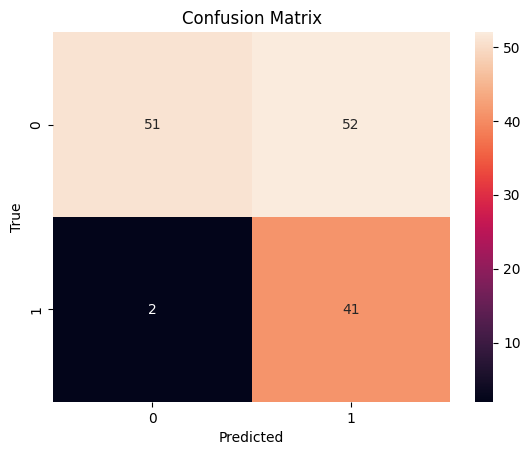

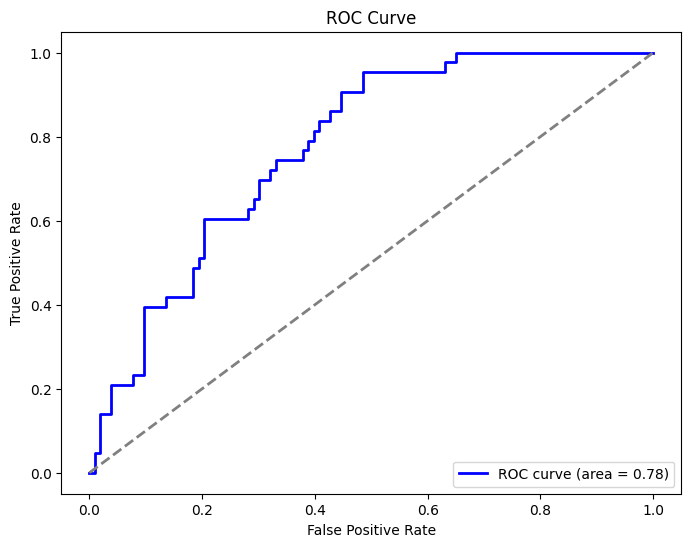

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
import seaborn as sns
from imblearn.over_sampling import SMOTE

features = wide_data_dropped_time.drop(columns=['death', 'SUBJECT_ID'], axis=1)
labels = wide_data_dropped_time['death']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

clf = svm.SVC(kernel='poly', probability=True)
clf.fit(X_train_smote, y_train_smote)

y_pred = clf.predict(X_test)

y_probs = clf.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_probs)
print(f"ROC AUC Score: {roc_auc}")

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()